# Microsoft Corporation

## Getting Microsoft's Stock Data

In [18]:
! pip install yahooquery

In [257]:
from yahooquery import Ticker

msft = Ticker('msft')

## Data Loading

In [258]:
msft.history()  #This shows to the recent data by default

open        high         low       close    volume  \
symbol date                                                                   
msft   2024-01-02  373.859985  375.899994  366.769989  370.869995  25258600   
       2024-01-03  369.010010  373.260010  368.510010  370.600006  23083500   
       2024-01-04  370.670013  373.100006  367.170013  367.940002  20901500   
       2024-01-05  368.970001  372.059998  366.500000  367.750000  20987000   
       2024-01-08  369.299988  375.200012  369.010010  374.690002  23134000   
...                       ...         ...         ...         ...       ...   
       2024-03-22  429.700012  429.859985  426.070007  428.739990  17636500   
       2024-03-25  425.239990  427.410004  421.609985  422.859985  18060500   
       2024-03-26  425.609985  425.989990  421.350006  421.649994  16725600   
       2024-03-27  424.440002  424.450012  419.010010  421.429993  16705000   
       2024-03-28  420.959991  421.869995  419.119995  420.720001  21871200   

                     adjclose  dividends  
symbol date                               
msft   2024-01-02  370.185425        0.0  
       2024-01-03  369.915924        0.0  
       2024-01-04  367.260834        0.0  
       2024-01-05  367.071198        0.0  
       2024-01-08  373.998383        0.0  
...                       ...        ...  
       2024-03-22  428.739990        0.0  
       2024-03-25  422.859985        0.0  
       2024-03-26  421.649994        0.0  
       2024-03-27  421.429993        0.0  
       2024-03-28  420.720001        0.0  

[61 rows x 7 columns]

In [313]:
df=msft.history(start='2014-01-01', end='2023-12-31')           # Defining the required period of stock data
df

open        high         low       close    volume  \
symbol date                                                                   
msft   2014-01-02   37.349998   37.400002   37.099998   37.160000  30632200   
       2014-01-03   37.200001   37.220001   36.599998   36.910000  31134800   
       2014-01-06   36.849998   36.889999   36.110001   36.130001  43603700   
       2014-01-07   36.330002   36.490002   36.209999   36.410000  35802800   
       2014-01-08   36.000000   36.139999   35.580002   35.759998  59971700   
...                       ...         ...         ...         ...       ...   
       2023-12-22  373.679993  375.179993  372.709991  374.579987  17091100   
       2023-12-26  375.000000  376.940002  373.500000  374.660004  12673100   
       2023-12-27  373.690002  375.059998  372.809998  374.070007  14905400   
       2023-12-28  375.369995  376.459991  374.160004  375.279999  14327000   
       2023-12-29  376.000000  377.160004  373.480011  376.040009  18723000   

                     adjclose  dividends  
symbol date                               
msft   2014-01-02   31.233055        0.0  
       2014-01-03   31.022924        0.0  
       2014-01-06   30.367348        0.0  
       2014-01-07   30.602678        0.0  
       2014-01-08   30.056368        0.0  
...                       ...        ...  
       2023-12-22  373.888580        0.0  
       2023-12-26  373.968445        0.0  
       2023-12-27  373.379547        0.0  
       2023-12-28  374.587280        0.0  
       2023-12-29  375.345886        0.0  

[2516 rows x 7 columns]

In [260]:
# Save data in memory to disk
df.to_csv('MSFT_stock_data.csv')

### Data Preprocessing

##### Import requried libraries


In [261]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

In [263]:
pd.options.mode.chained_assignment = None

##### Data Reduction

In [264]:
dataset = pd.read_csv('MSFT_stock_data.csv')
dataset = dataset.dropna()                    # Reducing the data by dropping unnecessary columns, like adjclose, dividends, etc
dataset = dataset[['date','volume','open', 'high', 'low', 'close']] 
dataset.head()

,date,volume,open,high,low,close
0,2014-01-02,30632200,37.349998,37.400002,37.099998,37.160000
1,2014-01-03,31134800,37.200001,37.220001,36.599998,36.910000
2,2014-01-06,43603700,36.849998,36.889999,36.110001,36.130001
3,2014-01-07,35802800,36.330002,36.490002,36.209999,36.410000
4,2014-01-08,59971700,36.000000,36.139999,35.580002,35.759998


## Features Creation

In [265]:
dataset['H-L'] = dataset['high'] - dataset['low'] 
dataset['C-O'] = dataset['close'] - dataset['open'] 
dataset['3day MA'] = dataset['close'].shift(1).rolling(window = 3).mean() 
dataset['10day MA'] = dataset['close'].shift(1).rolling(window = 10).mean() 

dataset['30day MA'] = dataset['close'].shift(1).rolling(window = 30).mean() 
dataset['Std_dev']= dataset['close'].rolling(5).std() 

dataset['Price_Rise'] = np.where(dataset['close'].shift(-1) > dataset['close'], 1, 0)
dataset = dataset.dropna()
dataset.head()

,date,volume,open,high,low,close,H-L,C-O,3day MA,10day MA,30day MA,Std_dev,Price_Rise
30,2014-02-14,31407500,37.389999,37.779999,37.330002,37.619999,0.449997,0.230000,37.416667,36.828,36.460000,0.349472,0
31,2014-02-18,32834000,37.630001,37.779999,37.410000,37.419998,0.369999,-0.210003,37.566667,36.806,36.475333,0.182949,1
32,2014-02-19,29750400,37.220001,37.750000,37.209999,37.509998,0.540001,0.289997,37.549999,36.900,36.492333,0.087350,1
33,2014-02-20,27526100,37.570000,37.869999,37.400002,37.750000,0.469997,0.180000,37.516665,37.016,36.538333,0.124379,1
34,2014-02-21,38021300,37.939999,38.349998,37.860001,37.980000,0.489998,0.040001,37.559999,37.209,36.583000,0.219158,0


## Exploratory Data Analysis (EDA)

##### Descriptive Statistics

In [266]:
dataset.describe()    # To show the summary statistics

,volume,open,high,low,close,H-L,C-O,3day MA,10day MA,30day MA,Std_dev,Price_Rise
count,2.486000e+03,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000
mean,2.999795e+07,151.169373,152.676227,149.620177,151.224554,3.056050,0.055181,150.952656,150.478178,149.123866,2.112427,0.527755
std,1.382120e+07,101.449258,102.503234,100.357030,101.480702,2.924295,2.562814,101.310759,101.008163,100.144333,2.155757,0.499329
min,7.425600e+06,37.220001,37.740002,37.189999,37.419998,0.240002,-15.670013,37.416667,36.806000,36.460000,0.050301,0.000000
25%,2.161240e+07,56.602499,56.952501,56.222499,56.692500,0.850002,-0.650002,56.613333,56.427500,54.957083,0.529041,0.000000
50%,2.678650e+07,111.415001,112.195000,110.389999,111.704998,1.849998,0.065002,110.970000,110.306499,109.459833,1.300255,1.000000
75%,3.407525e+07,243.834999,245.877499,241.410000,244.327496,4.509979,0.790001,243.892497,243.327501,242.100499,3.017633,1.000000
max,2.025224e+08,383.760010,384.299988,378.160004,382.700012,24.609985,22.079987,380.153341,377.088004,373.869002,14.000517,1.000000


In [267]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2486 entries, 30 to 2515
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2486 non-null   object 
 1   volume      2486 non-null   int64  
 2   open        2486 non-null   float64
 3   high        2486 non-null   float64
 4   low         2486 non-null   float64
 5   close       2486 non-null   float64
 6   H-L         2486 non-null   float64
 7   C-O         2486 non-null   float64
 8   3day MA     2486 non-null   float64
 9   10day MA    2486 non-null   float64
 10  30day MA    2486 non-null   float64
 11  Std_dev     2486 non-null   float64
 12  Price_Rise  2486 non-null   int32  
dtypes: float64(10), int32(1), int64(1), object(1)
memory usage: 262.2+ KB


In [268]:
print(dataset.isnull().sum()) # Checking for missing values

date          0
volume        0
open          0
high          0
low           0
close         0
H-L           0
C-O           0
3day MA       0
10day MA      0
30day MA      0
Std_dev       0
Price_Rise    0
dtype: int64


##### Data Visualisation: Plot the data

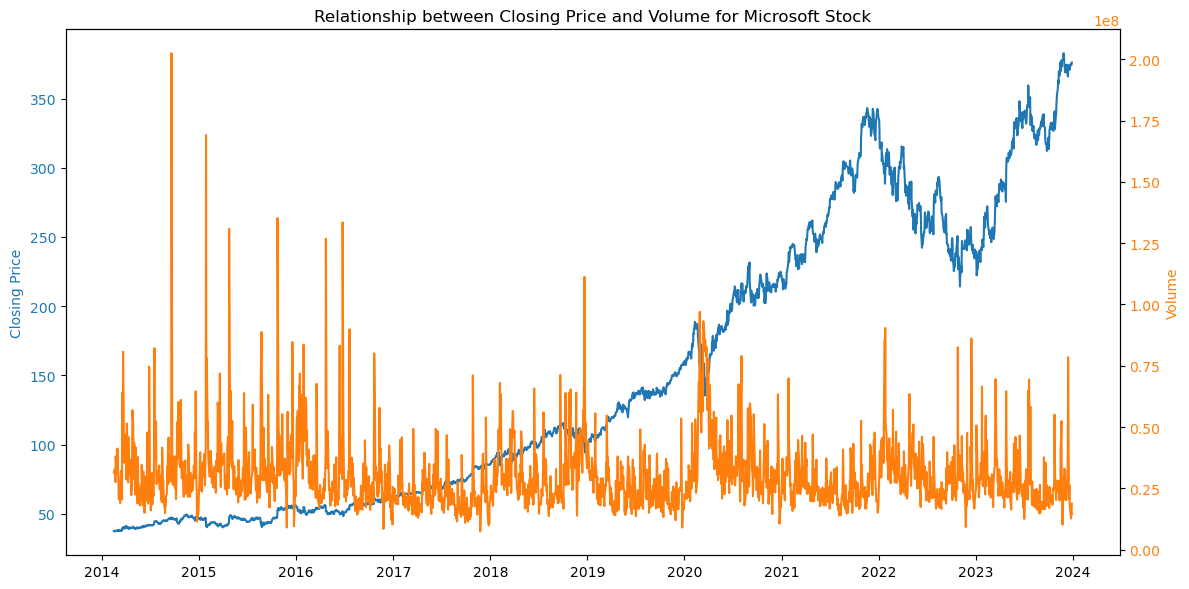

In [269]:
dataset['date'] = pd.to_datetime(dataset['date'])

fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:blue'
ax1.set_ylabel('Closing Price', color=color1)
ax1.plot(dataset['date'], dataset['close'], label='Close', color=color1)  # Using 'date' column for x-axis
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:orange'  
ax2.set_ylabel('Volume', color=color2)
ax2.plot(dataset['date'], dataset['volume'], label='Volume', color=color2)  # Using 'date' column for x-axis
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Relationship between Closing Price and Volume for Microsoft Stock')
fig.tight_layout()
plt.show()

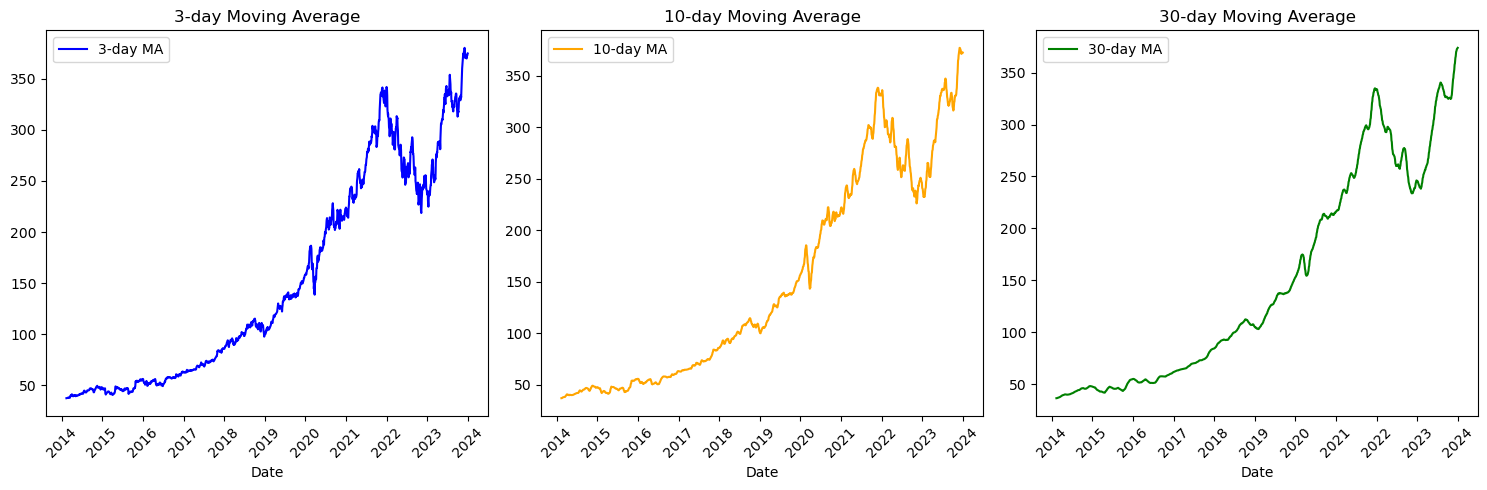

In [316]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True)

# Plot 3-day moving average in the first subplot
axes[0].plot(dataset['date'], dataset['3day MA'], label='3-day MA', color='blue')
axes[0].set_title('3-day Moving Average')

# Plot 10-day moving average in the second subplot
axes[1].plot(dataset['date'], dataset['10day MA'], label='10-day MA', color='orange')
axes[1].set_title('10-day Moving Average')

# Plot 30-day moving average in the third subplot
axes[2].plot(dataset['date'], dataset['30day MA'], label='30-day MA', color='green')
axes[2].set_title('30-day Moving Average')

# Set common xlabel for all subplots
for ax in axes:
    ax.set_xlabel('Date')

# Rotate x-axis labels for better readability
for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# Add legend to each subplot
for ax in axes:
    ax.legend()

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()

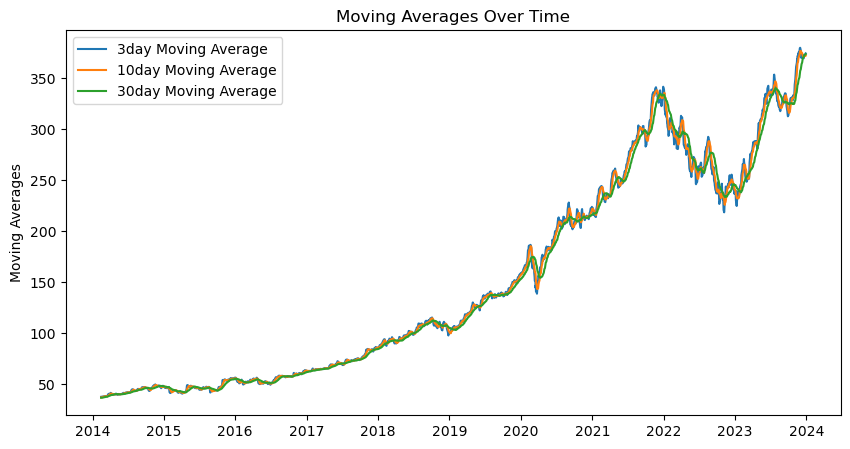

In [271]:
plt.figure(figsize=(10,5))  # Comparing all moving averages over time

plt.plot(dataset['date'], dataset['3day MA'], label='3day Moving Average')
plt.plot(dataset['date'], dataset['10day MA'], label='10day Moving Average')
plt.plot(dataset['date'], dataset['30day MA'], label='30day Moving Average')

plt.title('Moving Averages Over Time')
plt.ylabel('Moving Averages')
plt.legend()
plt.show()

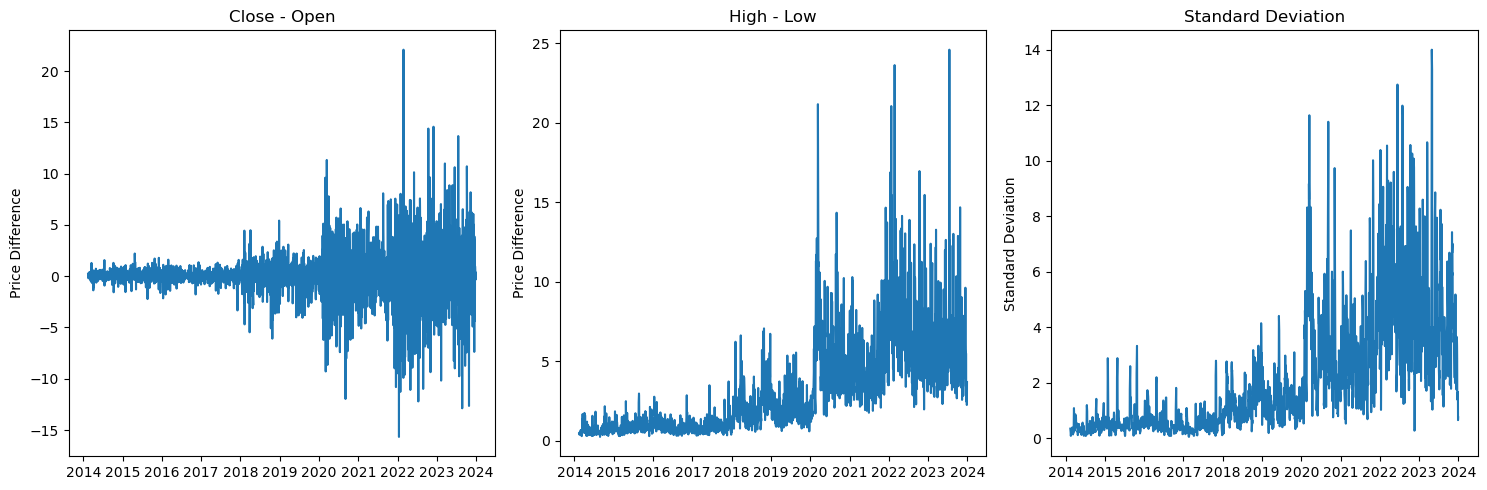

In [272]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].plot(dataset['date'], dataset['C-O'])        # Plot Price difference (Close - Open) in the first subplot
axes[0].set_title('Close - Open')
axes[0].set_ylabel('Price Difference')
axes[1].plot(dataset['date'], dataset['H-L'])        # Plot Price Difference (High - Low) in the second subplot
axes[1].set_title('High - Low')
axes[1].set_ylabel('Price Difference')
axes[2].plot(dataset['date'], dataset['Std_dev'])    # Plot Standard Deviation in the third subplot
axes[2].set_title('Standard Deviation')
axes[2].set_ylabel('Standard Deviation')

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()

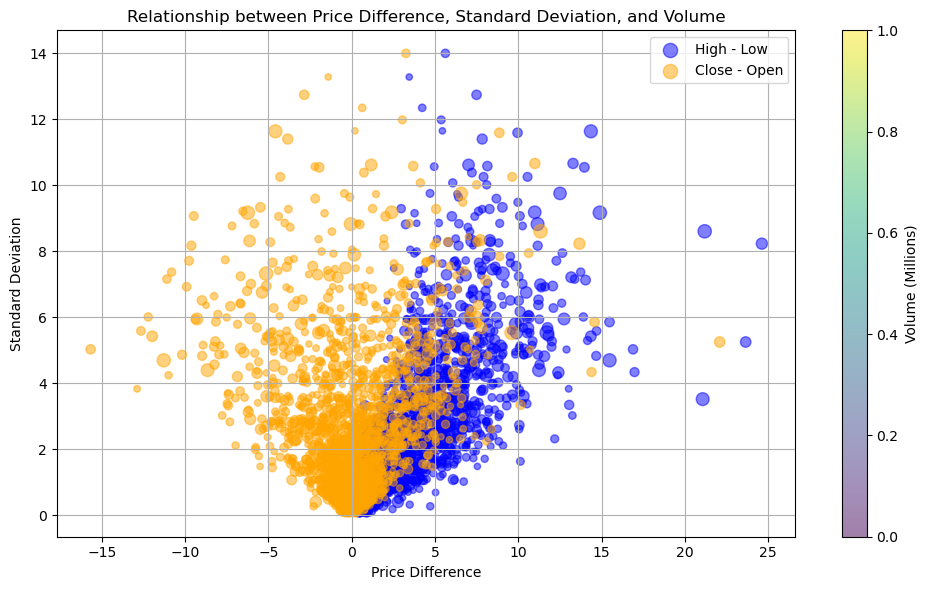

In [273]:
plt.figure(figsize=(10, 6))

# Scatter plot of Price Difference vs. Standard Deviation with marker size based on volume
plt.scatter(dataset['H-L'], dataset['Std_dev'], s=dataset['volume']/1e6, c='blue', alpha=0.5, label='High - Low')
plt.scatter(dataset['C-O'], dataset['Std_dev'], s=dataset['volume']/1e6, c='orange', alpha=0.5, label='Close - Open')

plt.xlabel('Price Difference')
plt.ylabel('Standard Deviation')
plt.title('Relationship between Price Difference, Standard Deviation, and Volume')
plt.legend()

# Add color bar indicating the range of volume
plt.colorbar(label='Volume (Millions)')

plt.grid(True)
plt.tight_layout()
plt.show()

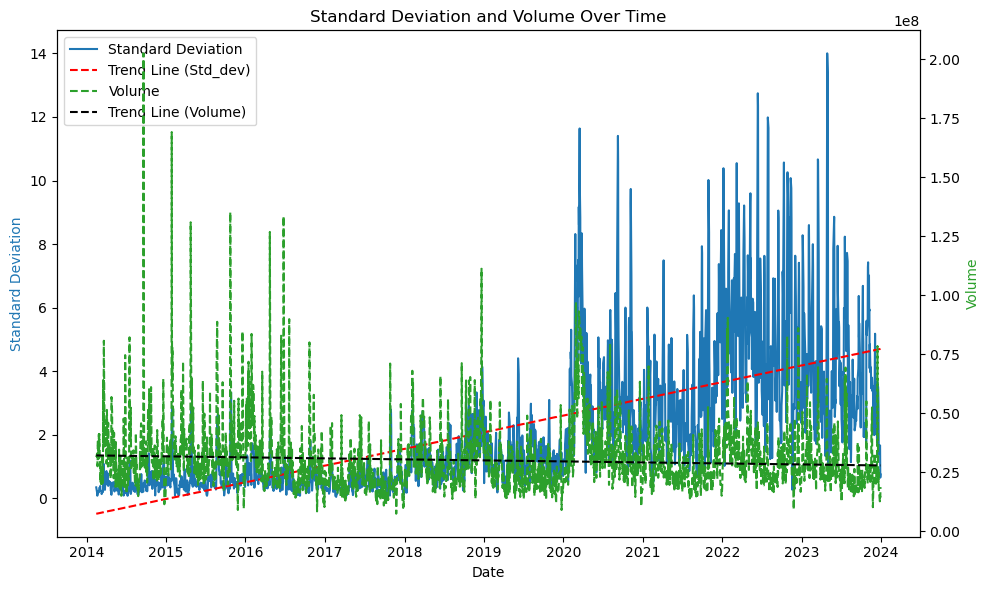

In [274]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot standard deviation on the primary y-axis with trend line
color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Standard Deviation', color=color1)
ax1.plot(dataset['date'], dataset['Std_dev'], color=color1, label='Standard Deviation')

# Calculate trend line for standard deviation
z = np.polyfit(dataset.index, dataset['Std_dev'], 1)
p = np.poly1d(z)
ax1.plot(dataset['date'], p(dataset.index), color='red', linestyle='--', label='Trend Line (Std_dev)')

# Create a secondary y-axis for volume
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Volume', color=color2)
ax2.plot(dataset['date'], dataset['volume'], color=color2, linestyle='--', label='Volume')

# Calculate trend line for volume
z_volume = np.polyfit(dataset.index, dataset['volume'], 1)
p_volume = np.poly1d(z_volume)
ax2.plot(dataset['date'], p_volume(dataset.index), color='black', linestyle='--', label='Trend Line (Volume)')

# Combine the legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
plt.title('Standard Deviation and Volume Over Time')

plt.tight_layout()
plt.show()

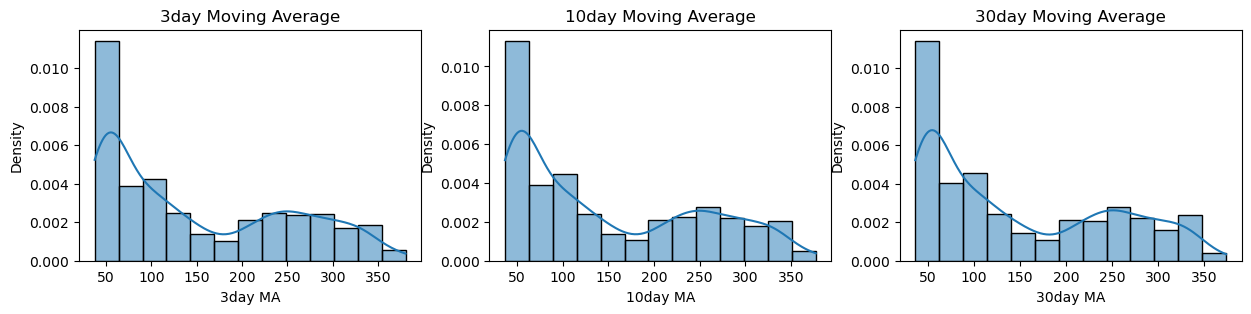

In [275]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))  # Creating subplots in 1 row and 3 columns

sns.histplot(data=dataset, x="3day MA", kde=True, stat="density", ax=axes[0])
axes[0].set_title('3day Moving Average')

sns.histplot(data=dataset, x="10day MA", kde=True, stat="density", ax=axes[1])
axes[1].set_title('10day Moving Average')

sns.histplot(data=dataset, x="30day MA", kde=True, stat="density", ax=axes[2])
axes[2].set_title('30day Moving Average')

plt.show()

##### Correlation Matrix

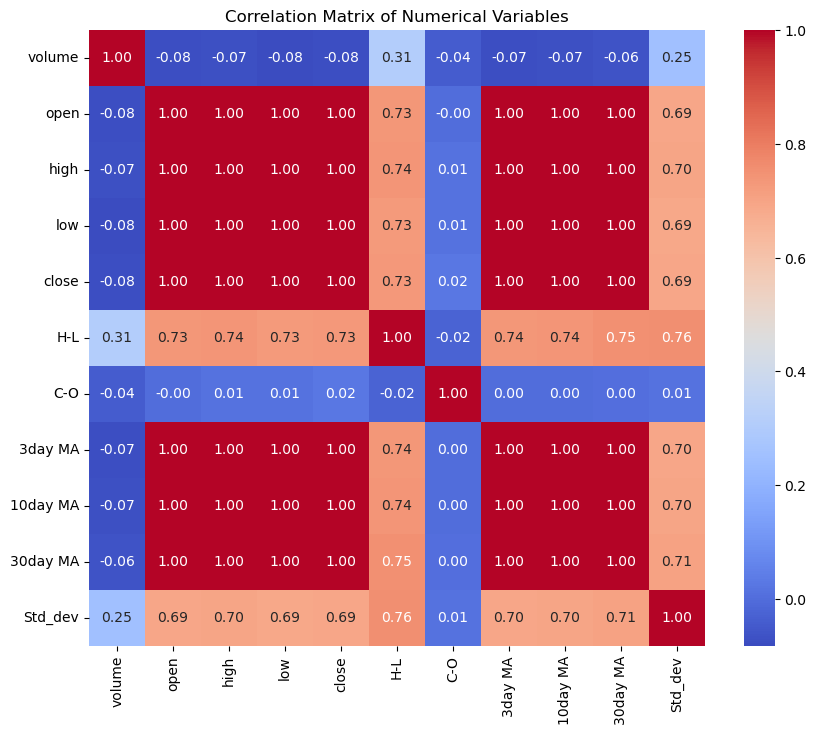

In [276]:
numerical_cols = ['volume', 'open', 'high', 'low', 'close', 'H-L', 'C-O', '3day MA', '10day MA', '30day MA', 'Std_dev']

# Calculate the correlation matrix
correlation_matrix = dataset[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title('Correlation Matrix of Numerical Variables')
plt.show()

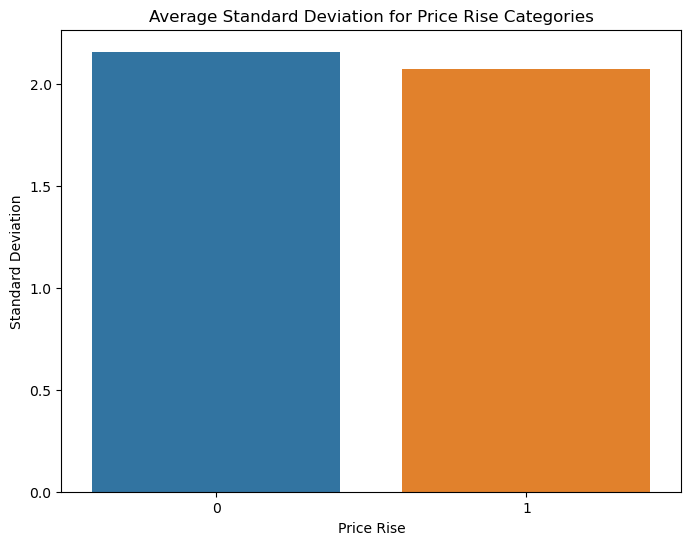

In [277]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Price_Rise', y='Std_dev', data=dataset, ci=None)

# Set labels and title
plt.xlabel('Price Rise')
plt.ylabel('Standard Deviation')
plt.title('Average Standard Deviation for Price Rise Categories')

plt.show()

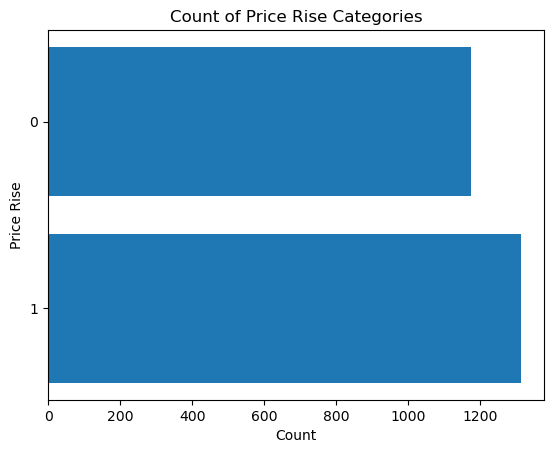

In [278]:
# Calculate the count of occurrences for each category of Price_Rise
price_rise_counts = dataset['Price_Rise'].value_counts()

# Define the range of values for the y-axis
range1 = range(len(price_rise_counts))

# Create a horizontal bar plot
plt.title('Count of Price Rise Categories')
plt.barh(range1, price_rise_counts)

# Set y-axis ticks and labels
plt.yticks(range1, price_rise_counts.index)
plt.ylabel('Price Rise')
plt.xlabel('Count')

plt.show()

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


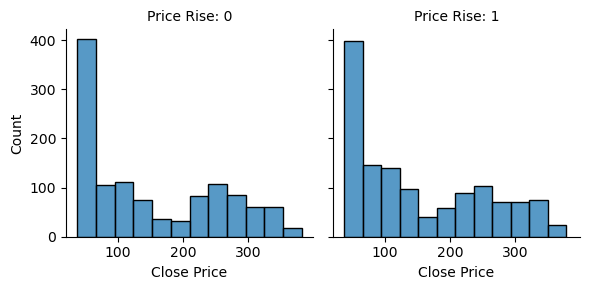

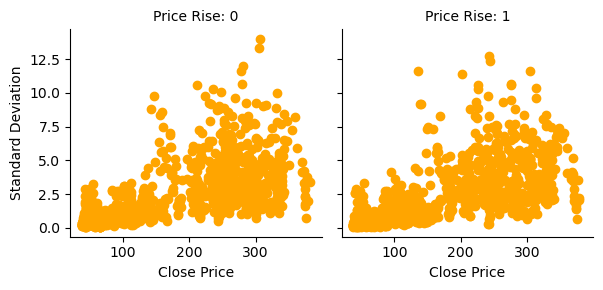

In [279]:
chart1 = sns.FacetGrid(dataset, col='Price_Rise', height=3)
chart1.map(sns.histplot, 'close')
chart1.set_axis_labels('Close Price', 'Count')
chart1.set_titles('Price Rise: {col_name}')

# Create a new FacetGrid for scatter plot of 'Close' prices against 'Std_dev' by 'Price_Rise'
chart2 = sns.FacetGrid(dataset, col='Price_Rise', height=3)
chart2.map(plt.scatter, 'close', 'Std_dev', color='orange')
chart2.set_axis_labels('Close Price', 'Standard Deviation')
chart2.set_titles('Price Rise: {col_name}')

plt.show()

## Machine Learning Classification Methods

In [280]:
# Assigning data to the variables
# X includes columns from the 4th index (or fifth column) of the dataset up to the second-to-last column, 
# and y corresponds to the last column that we want to predict (Price_Rise). 
X = dataset.iloc[:, 6:-1] 
Y = dataset.iloc[:, -1]

In [281]:
X

,H-L,C-O,3day MA,10day MA,30day MA,Std_dev
30,0.449997,0.230000,37.416667,36.828000,36.460000,0.349472
31,0.369999,-0.210003,37.566667,36.806000,36.475333,0.182949
32,0.540001,0.289997,37.549999,36.900000,36.492333,0.087350
33,0.469997,0.180000,37.516665,37.016000,36.538333,0.124379
34,0.489998,0.040001,37.559999,37.209000,36.583000,0.219158
...,...,...,...,...,...,...
2511,2.470001,0.899994,372.473338,372.101001,372.826336,1.467821
2512,3.440002,-0.339996,372.913330,372.135999,373.289335,1.637413
2513,2.250000,0.380005,374.260000,372.472000,373.455668,1.668288
2514,2.299988,-0.089996,374.436666,372.441000,373.702002,0.655648


In [282]:
Y

30      0
31      1
32      1
33      1
34      0
       ..
2511    1
2512    0
2513    1
2514    1
2515    0
Name: Price_Rise, Length: 2486, dtype: int32

In [283]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
X_test

,H-L,C-O,3day MA,10day MA,30day MA,Std_dev
2018,7.210022,0.730011,326.713338,334.932007,332.480002,10.386779
2019,6.410004,-0.109985,319.756673,333.000006,331.686669,9.641449
2020,10.029999,4.779999,314.766673,330.935007,330.891002,6.504658
2021,6.719971,1.600006,314.063334,328.117004,330.377336,1.023867
2022,6.330017,-1.400024,314.430003,325.490005,329.655669,1.827799
...,...,...,...,...,...,...
2511,2.470001,0.899994,372.473338,372.101001,372.826336,1.467821
2512,3.440002,-0.339996,372.913330,372.135999,373.289335,1.637413
2513,2.250000,0.380005,374.260000,372.472000,373.455668,1.668288
2514,2.299988,-0.089996,374.436666,372.441000,373.702002,0.655648


In [284]:
        # Initialize StandardScaler
        sc = StandardScaler()

        # Fit and transform X_train
        X_train_scaled = sc.fit_transform(X_train)

        # Transform X_test
        X_test_scaled = sc.transform(X_test)

##### Logistic Regression

In [285]:
# Initialize logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, Y_train)

# Predictions on the test set
y_pred_logistic = log_reg.predict(X_test_scaled)

# Evaluate the model
print (classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.34      0.41       246
           1       0.51      0.68      0.59       252

    accuracy                           0.51       498
   macro avg       0.51      0.51      0.50       498
weighted avg       0.51      0.51      0.50       498



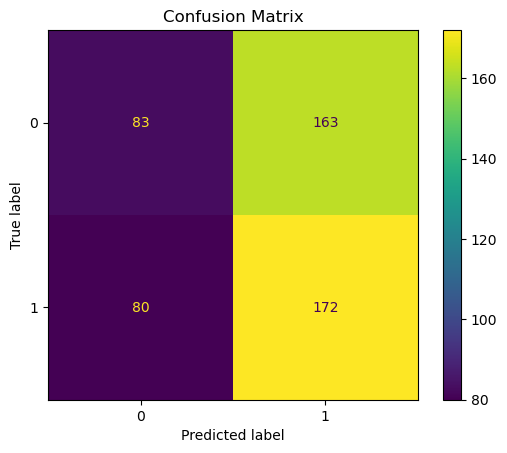

In [286]:
# Predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model by means of a Confusion Matrix
matrix = ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, Y_test)  

plt.title('Confusion Matrix')
plt.show(matrix)

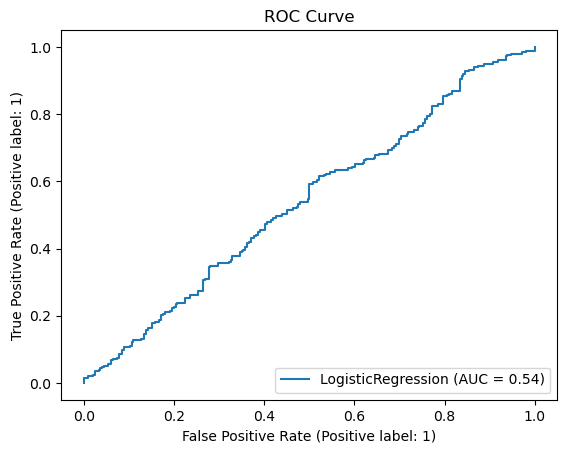

In [287]:
# Create ROC curve display
roc_disp = RocCurveDisplay.from_estimator(log_reg, X_test_scaled, Y_test)

# Add title and show plot
plt.title('ROC Curve')
plt.show()

##### Extra Trees Classifier

In [288]:
# Extra Trees Classifier Model
classifier = ExtraTreesClassifier(random_state=101)
# Train the Model
classifier.fit(X_train, Y_train)

ExtraTreesClassifier(random_state=101)

In [289]:
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.49      0.42      0.45       246
           1       0.50      0.57      0.53       252

    accuracy                           0.50       498
   macro avg       0.50      0.50      0.49       498
weighted avg       0.50      0.50      0.49       498



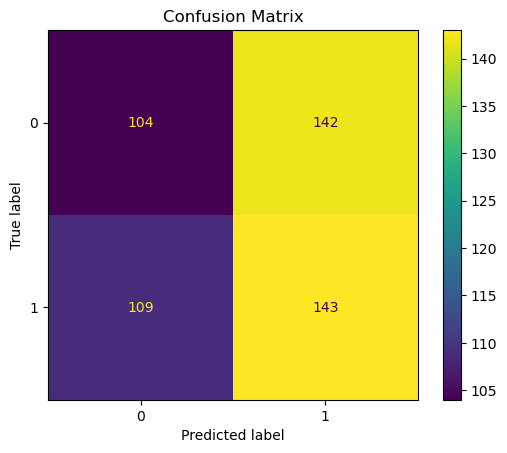

In [290]:
# Confusion Matrix
cm_disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test)

plt.title('Confusion Matrix')
plt.show()

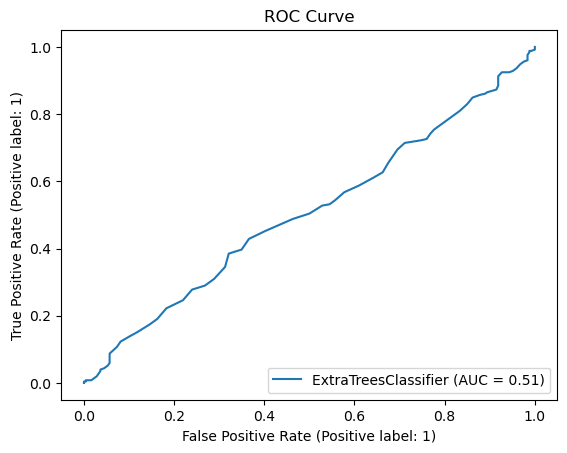

In [291]:
# ROC Curve
roc_disp = RocCurveDisplay.from_estimator(classifier, X_test, Y_test)

plt.title('ROC Curve')
plt.show()

## Cross-Validation

In [292]:
# Initialize logistic regression model
log_reg = LogisticRegression(random_state=101)

# Perform cross-validation for logistic regression
log_reg_scores = cross_val_score(log_reg, X_train, Y_train, cv=5)

# Print cross-validation scores for logistic regression
print("Cross-Validation Scores for Logistic Regression:")
print(log_reg_scores)
print("Mean Accuracy based on Cross-Validation Score: {:.2f}".format(round(log_reg_scores.mean(), 2)))
print("Standard Deviation of Cross-Validation Scores: {:.4f}".format(round(log_reg_scores.std(), 4)))
print()

Cross-Validation Scores for Logistic Regression:
[0.52512563 0.53517588 0.52512563 0.52644836 0.53400504]
Mean Accuracy based on Cross-Validation Score: 0.53
Standard Deviation of Cross-Validation Scores: 0.0045



In [293]:
# Perform cross-validation for ExtraTreesClassifier
extra_trees_scores = cross_val_score(classifier, X_train, Y_train, cv=5)

# Print cross-validation scores for ExtraTreesClassifier
print("Cross-Validation Scores for ExtraTreesClassifier:")
print(extra_trees_scores)
print("Mean Accuracy based on Cross-Validation Score: {:.2f}".format(round(extra_trees_scores.mean(), 2)))
print("Standard Deviation of Cross-Validation Scores: {:.4f}".format(round(extra_trees_scores.std(), 4)))

Cross-Validation Scores for ExtraTreesClassifier:
[0.46733668 0.40954774 0.45728643 0.52141058 0.45843829]
Mean Accuracy based on Cross-Validation Score: 0.46
Standard Deviation of Cross-Validation Scores: 0.0356


In [294]:
# Compare mean cross-validation scores
if log_reg_scores.mean() > extra_trees_scores.mean():
    print("Logistic Regression performs better with a mean cross-validation score of {:.2f} and standard deviation of {:.4f}".format(log_reg_scores.mean(), log_reg_scores.std()))
elif log_reg_scores.mean() < extra_trees_scores.mean():
    print("ExtraTreesClassifier performs better with a mean cross-validation score of {:.2f} and standard deviation of {:.4f}".format(extra_trees_scores.mean(), extra_trees_scores.std()))
else:
    print("Both models have the same mean cross-validation score of {:.2f} and standard deviation of {:.4f}".format(log_reg_scores.mean(), log_reg_scores.std()))

Logistic Regression performs better with a mean cross-validation score of 0.53 and standard deviation of 0.0045


##### Features Importance

In [295]:
feature_names=X.columns

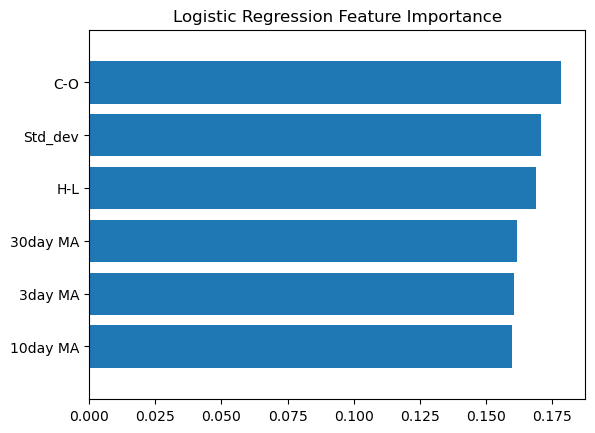

In [296]:
importance = classifier.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("Logistic Regression Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()

## Trading Strategies - Predicitng the Price using Logistic Regression Model

In [297]:
trade_dataset = dataset.copy() #Create a copy of original dataset for trade analysis

In [298]:
dataset['Y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(Y_pred)):,-1] = Y_pred
trade_dataset = dataset.dropna()
trade_dataset

,date,volume,open,high,low,close,H-L,C-O,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred
2018,2022-01-06,39646100,313.149994,318.700012,311.489990,313.880005,7.210022,0.730011,326.713338,334.932007,332.480002,10.386779,1,0.0
2019,2022-01-07,32720000,314.149994,316.500000,310.089996,314.040009,6.410004,-0.109985,319.756673,333.000006,331.686669,9.641449,1,1.0
2020,2022-01-10,44289500,309.489990,314.720001,304.690002,314.269989,10.029999,4.779999,314.766673,330.935007,330.891002,6.504658,1,1.0
2021,2022-01-11,29386800,313.380005,316.609985,309.890015,314.980011,6.719971,1.600006,314.063334,328.117004,330.377336,1.023867,1,1.0
2022,2022-01-12,34372200,319.670013,323.410004,317.079987,318.269989,6.330017,-1.400024,314.430003,325.490005,329.655669,1.827799,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,17091100,373.679993,375.179993,372.709991,374.579987,2.470001,0.899994,372.473338,372.101001,372.826336,1.467821,1,0.0
2512,2023-12-26,12673100,375.000000,376.940002,373.500000,374.660004,3.440002,-0.339996,372.913330,372.135999,373.289335,1.637413,0,0.0
2513,2023-12-27,14905400,373.690002,375.059998,372.809998,374.070007,2.250000,0.380005,374.260000,372.472000,373.455668,1.668288,1,0.0
2514,2023-12-28,14327000,375.369995,376.459991,374.160004,375.279999,2.299988,-0.089996,374.436666,372.441000,373.702002,0.655648,1,0.0


Now that we have the predicted values of the stock movement. We can compute the returns of the strategy. We will be taking a long position when the predicted value of y is true and will take a short position when the predicted signal is False.

In [299]:
trade_dataset['Tomorrows Returns'] = 0. # Creating new column for Tomorrow's return
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['close'].shift(-1) / trade_dataset['close'])
trade_dataset

,date,volume,open,high,low,close,H-L,C-O,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns
2018,2022-01-06,39646100,313.149994,318.700012,311.489990,313.880005,7.210022,0.730011,326.713338,334.932007,332.480002,10.386779,1,0.0,0.000510
2019,2022-01-07,32720000,314.149994,316.500000,310.089996,314.040009,6.410004,-0.109985,319.756673,333.000006,331.686669,9.641449,1,1.0,0.000732
2020,2022-01-10,44289500,309.489990,314.720001,304.690002,314.269989,10.029999,4.779999,314.766673,330.935007,330.891002,6.504658,1,1.0,0.002257
2021,2022-01-11,29386800,313.380005,316.609985,309.890015,314.980011,6.719971,1.600006,314.063334,328.117004,330.377336,1.023867,1,1.0,0.010391
2022,2022-01-12,34372200,319.670013,323.410004,317.079987,318.269989,6.330017,-1.400024,314.430003,325.490005,329.655669,1.827799,0,1.0,-0.043244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,17091100,373.679993,375.179993,372.709991,374.579987,2.470001,0.899994,372.473338,372.101001,372.826336,1.467821,1,0.0,0.000214
2512,2023-12-26,12673100,375.000000,376.940002,373.500000,374.660004,3.440002,-0.339996,372.913330,372.135999,373.289335,1.637413,0,0.0,-0.001576
2513,2023-12-27,14905400,373.690002,375.059998,372.809998,374.070007,2.250000,0.380005,374.260000,372.472000,373.455668,1.668288,1,0.0,0.003229
2514,2023-12-28,14327000,375.369995,376.459991,374.160004,375.279999,2.299988,-0.089996,374.436666,372.441000,373.702002,0.655648,1,0.0,0.002023


In [300]:
trade_dataset['Strategy Returns'] = 0.  # Creating another column for Strategy Returns
trade_dataset['Strategy Returns'] = np.where(y_pred_logistic == 1, trade_dataset['Tomorrows Returns'], -trade_dataset['Tomorrows Returns'])
trade_dataset

,date,volume,open,high,low,close,H-L,C-O,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns,Strategy Returns
2018,2022-01-06,39646100,313.149994,318.700012,311.489990,313.880005,7.210022,0.730011,326.713338,334.932007,332.480002,10.386779,1,0.0,0.000510,-0.000510
2019,2022-01-07,32720000,314.149994,316.500000,310.089996,314.040009,6.410004,-0.109985,319.756673,333.000006,331.686669,9.641449,1,1.0,0.000732,-0.000732
2020,2022-01-10,44289500,309.489990,314.720001,304.690002,314.269989,10.029999,4.779999,314.766673,330.935007,330.891002,6.504658,1,1.0,0.002257,-0.002257
2021,2022-01-11,29386800,313.380005,316.609985,309.890015,314.980011,6.719971,1.600006,314.063334,328.117004,330.377336,1.023867,1,1.0,0.010391,0.010391
2022,2022-01-12,34372200,319.670013,323.410004,317.079987,318.269989,6.330017,-1.400024,314.430003,325.490005,329.655669,1.827799,0,1.0,-0.043244,-0.043244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,17091100,373.679993,375.179993,372.709991,374.579987,2.470001,0.899994,372.473338,372.101001,372.826336,1.467821,1,0.0,0.000214,0.000214
2512,2023-12-26,12673100,375.000000,376.940002,373.500000,374.660004,3.440002,-0.339996,372.913330,372.135999,373.289335,1.637413,0,0.0,-0.001576,-0.001576
2513,2023-12-27,14905400,373.690002,375.059998,372.809998,374.070007,2.250000,0.380005,374.260000,372.472000,373.455668,1.668288,1,0.0,0.003229,0.003229
2514,2023-12-28,14327000,375.369995,376.459991,374.160004,375.279999,2.299988,-0.089996,374.436666,372.441000,373.702002,0.655648,1,0.0,0.002023,0.002023


##### Cumulative Market Returns and Cumulative Strategy Returns

In [311]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])
trade_dataset

,date,volume,open,high,low,close,H-L,C-O,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns
2018,2022-01-06,39646100,313.149994,318.700012,311.489990,313.880005,7.210022,0.730011,326.713338,334.932007,332.480002,10.386779,1,0.0,0.000510,-0.000510,0.000510,-0.000510
2019,2022-01-07,32720000,314.149994,316.500000,310.089996,314.040009,6.410004,-0.109985,319.756673,333.000006,331.686669,9.641449,1,1.0,0.000732,-0.000732,0.001242,-0.001242
2020,2022-01-10,44289500,309.489990,314.720001,304.690002,314.269989,10.029999,4.779999,314.766673,330.935007,330.891002,6.504658,1,1.0,0.002257,-0.002257,0.003498,-0.003498
2021,2022-01-11,29386800,313.380005,316.609985,309.890015,314.980011,6.719971,1.600006,314.063334,328.117004,330.377336,1.023867,1,1.0,0.010391,0.010391,0.013889,0.006892
2022,2022-01-12,34372200,319.670013,323.410004,317.079987,318.269989,6.330017,-1.400024,314.430003,325.490005,329.655669,1.827799,0,1.0,-0.043244,-0.043244,-0.029355,-0.036352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2023-12-21,17708000,372.559998,374.410004,370.040009,373.540009,4.369995,0.980011,372.176666,371.842001,372.481669,1.393828,1,0.0,0.002780,0.002780,0.176795,0.504799
2511,2023-12-22,17091100,373.679993,375.179993,372.709991,374.579987,2.470001,0.899994,372.473338,372.101001,372.826336,1.467821,1,0.0,0.000214,0.000214,0.177008,0.505013
2512,2023-12-26,12673100,375.000000,376.940002,373.500000,374.660004,3.440002,-0.339996,372.913330,372.135999,373.289335,1.637413,0,0.0,-0.001576,-0.001576,0.175432,0.503437
2513,2023-12-27,14905400,373.690002,375.059998,372.809998,374.070007,2.250000,0.380005,374.260000,372.472000,373.455668,1.668288,1,0.0,0.003229,0.003229,0.178662,0.506666


Plot of Cumulative Market and Strategy Returns

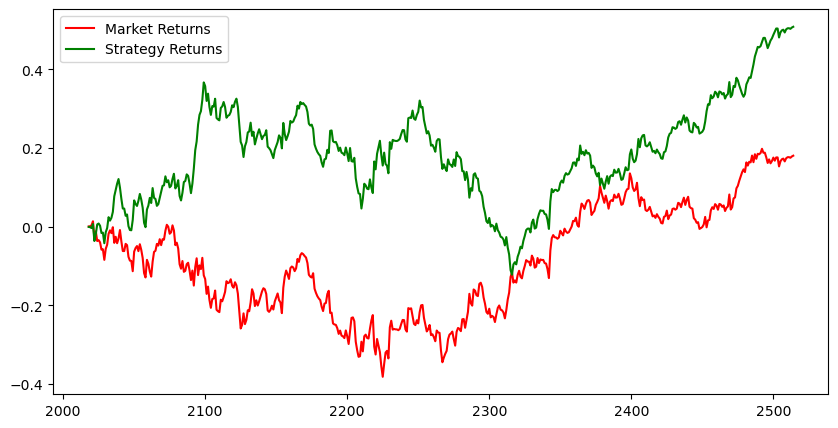

In [312]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()